In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
xls = pd.ExcelFile('data/data_edit.xlsx'); # Read Excel file into object.
df = pd.read_excel(xls, sheet_name="DNA ALL"); # put object into data frame. This only takes the first sheet.
df # show Data Frame

,Row 9,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Row 10,...,Unnamed: 61,Unnamed: 62,Row 16,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70
0,Image number,Time,ROI 1,Background 1,Subtract 1,End point ROI,End point Subtracted,Image number,NaN,Image number,...,Image number,NaN,Image number,Time,ROI 1,Background 1,Subtract 1,End point ROI,End point Subtracted,Image number
1,192,0,1036,851,185,NaN,385,192,NaN,216,...,336,NaN,360,0,969,874,95,NaN,475,360
2,192,0.25,1102,848,254,NaN,360,193,NaN,216,...,337,NaN,360,0.25,1189,871,318,NaN,410,361
3,192,0.5,1104,847,257,NaN,1135,194,NaN,216,...,338,NaN,360,0.5,1175,870,305,NaN,372,362
4,192,0.75,1157,849,308,NaN,293,195,NaN,216,...,339,NaN,360,0.75,1202,876,326,NaN,404,363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,Sqrt,13.856406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584,Min,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585,Max,1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
586,Range,999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Convert data frame to numpy array
a = df.to_numpy()
a.shape # look at size of array and make sure it matches the dataframe

(588, 71)

In [4]:
# Read all data into array
# Nested for loop for rows and columns

datalist = []

for i in range(8):
    for j in range(24):
        datalist.append(a[1+16*j:17+16*j,0+9*i:4+9*i])

stackeddata = np.stack(datalist,axis=0)
stackeddata.shape # All our data in one array, ready for processing

(192, 16, 4)

In [ ]:
stackeddata[-1,:,:] # 1st dataset

In [5]:
# Background subtraction

d = stackeddata[:,:,2]-stackeddata[:,:,3]
d.shape

(192, 16)

In [6]:
# Reshape to look like device
rearranged = d.reshape(8,24,16)
rearranged[:,:,0]

array([[185, 162, 1146, 182, 171, 172, 182, 170, 177, 184, 208, 218, 220,
        150, 148, 157, 160, 162, 173, 220, 222, 248, 185, 146],
       [174, 157, 144, 167, 175, 196, 213, 219, 221, 224, 198, 198, 200,
        199, 208, 216, 217, 202, 191, 175, 195, 184, 160, 111],
       [161, 240, 218, 223, 216, 232, 253, 269, 274, 279, 335, 337, 340,
        346, 344, 340, 343, 349, 364, 360, 343, 327, 298, 274],
       [219, 264, 266, 269, 277, 284, 291, 287, 285, 276, 277, 282, 291,
        285, 251, 262, 267, 260, 281, 269, 275, 268, 238, 220],
       [122, 131, 122, 119, 113, 113, 114, 121, 126, 317, 348, 350, 357,
        363, 365, 370, 378, 385, 372, 376, 367, 331, 314, 328],
       [179, 165, 166, 178, 175, 193, 219, 222, 214, 221, 241, 235, 235,
        236, 241, 240, 252, 265, 278, 268, 285, 278, 192, 223],
       [106, 122, 140, 134, 137, 146, 164, 165, 160, 156, 161, 175, 173,
        288, 298, 309, 314, 302, 310, 316, 315, 307, 271, 233],
       [95, 96, 83, 170, 226, 227, 220, 

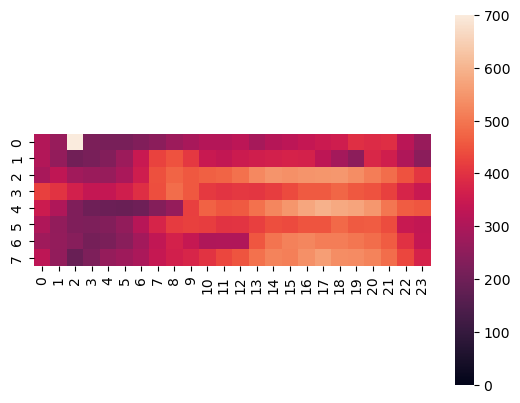

In [7]:
# Heatmap 
sns.heatmap(rearranged[:,:,3].astype(float),square=True,vmin=0,vmax=700)
plt.show()

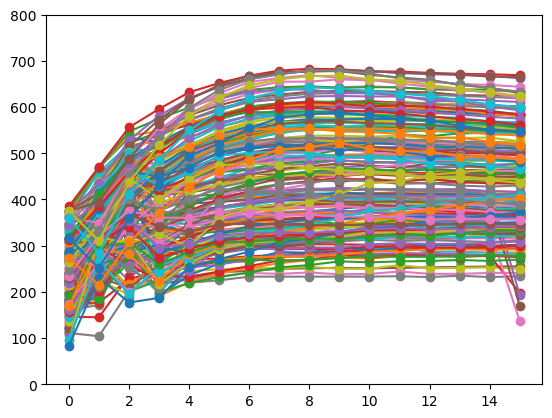

In [8]:
for i in range(8):
    for j in range(24):
        plt.plot(rearranged[i,j,:],'o-')
plt.ylim([0,800]);
plt.show()

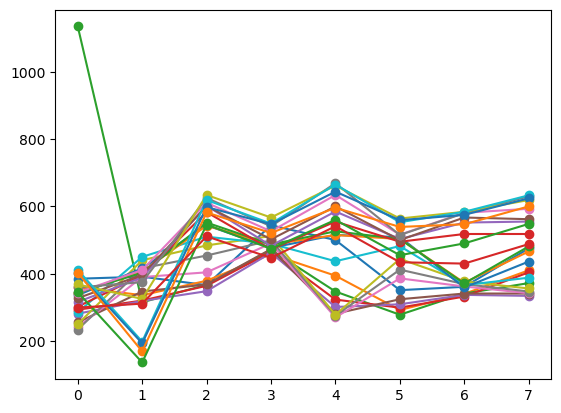

In [9]:
# Plot by column 
for i in range(24):
    plt.plot(rearranged[:,i,15],'o-')
plt.show()

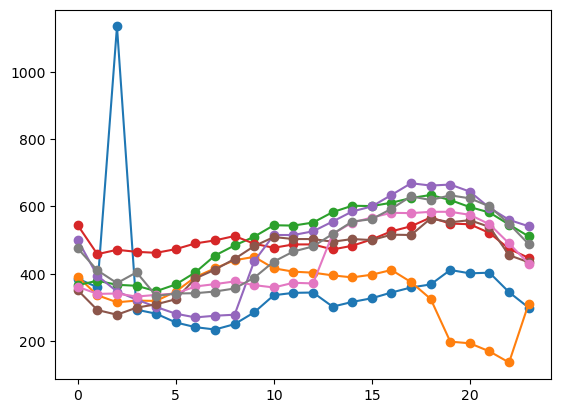

In [10]:
# Plot by row
for i in range(8):
    plt.plot(rearranged[i,:,15],'o-')
plt.show()

In [ ]:
#### Example code

In [ ]:
a[1,1] # row, column
a[1:17,1] # range of rows, one column: 1D array
a[1:17,1:4] # range of rows, range of columns: 2D array
a[1:17,[1,4]] # range of rows, specific columns

In [ ]:
# Basic for loop
for i in range(5):
    print(i*16)

In [ ]:
# For loop to select data down rows
for i in range(3):
    print(a[1+16*i:17+16*i,1:4])

# For loop to select data across columns
for i in range(8):
    print(a[1:17,0+9*i:4+9*i])